In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/karim1.jpg')

In [3]:
img.shape

(900, 1600, 3)

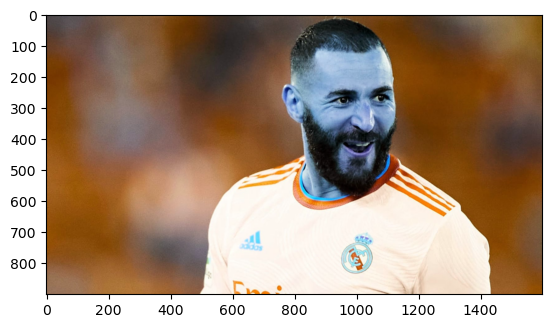

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(900, 1600)

In [6]:
gray

array([[ 80,  80,  76, ...,  71,  73,  75],
       [ 77,  77,  73, ...,  70,  72,  74],
       [ 74,  74,  71, ...,  69,  71,  72],
       ...,
       [110, 108, 109, ...,  65,  68,  73],
       [109, 107, 108, ...,  66,  66,  70],
       [108, 106, 107, ...,  66,  65,  67]], dtype=uint8)

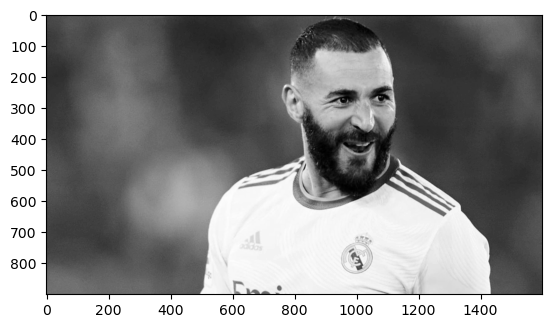

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[830, 129, 373, 373]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(830, 129, 373, 373)

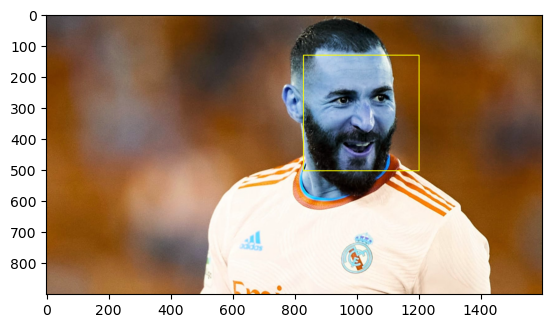

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
plt.imshow(face_img)

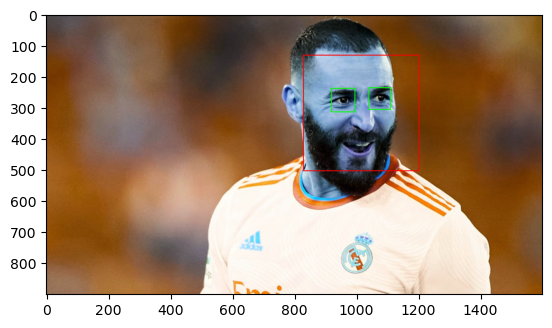

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

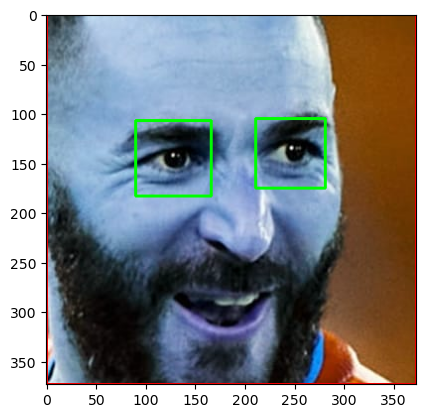

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
cropped_img = np.array(roi_color)
cropped_img.shape

(373, 373, 3)

In [14]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

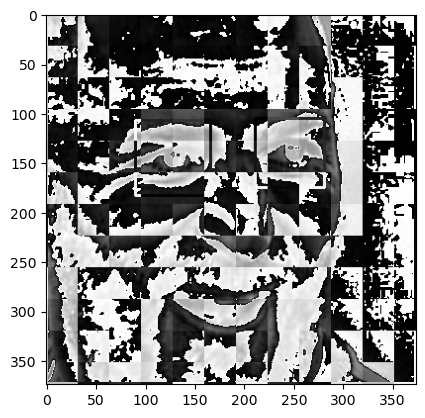

In [15]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    img = image_path
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [17]:
def increase_brightness(img, value=30):
    hsvimg = cv2.imread(img)
    hsv = cv2.cvtColor(hsvimg, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [18]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/cropped',
 './dataset/david_alaba',
 './dataset/fede_valverde',
 './dataset/karim_benzema',
 './dataset/luka_modric',
 './dataset/toni_kroos']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        ib = increase_brightness(entry.path, value=30)
        roi_color = get_cropped_image_if_2_eyes(ib)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/david_alaba
Generating cropped images in folder:  ./dataset/cropped/fede_valverde
Generating cropped images in folder:  ./dataset/cropped/karim_benzema
Generating cropped images in folder:  ./dataset/cropped/luka_modric
Generating cropped images in folder:  ./dataset/cropped/toni_kroos


In [23]:
print(cropped_image_dirs)

['./dataset/cropped/david_alaba', './dataset/cropped/fede_valverde', './dataset/cropped/karim_benzema', './dataset/cropped/luka_modric', './dataset/cropped/toni_kroos']


In [24]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'david_alaba': ['./dataset/cropped/david_alaba\\david_alaba1.png',
  './dataset/cropped/david_alaba\\david_alaba10.png',
  './dataset/cropped/david_alaba\\david_alaba11.png',
  './dataset/cropped/david_alaba\\david_alaba12.png',
  './dataset/cropped/david_alaba\\david_alaba13.png',
  './dataset/cropped/david_alaba\\david_alaba14.png',
  './dataset/cropped/david_alaba\\david_alaba15.png',
  './dataset/cropped/david_alaba\\david_alaba16.png',
  './dataset/cropped/david_alaba\\david_alaba17.png',
  './dataset/cropped/david_alaba\\david_alaba18.png',
  './dataset/cropped/david_alaba\\david_alaba19.png',
  './dataset/cropped/david_alaba\\david_alaba2.png',
  './dataset/cropped/david_alaba\\david_alaba20.png',
  './dataset/cropped/david_alaba\\david_alaba21.png',
  './dataset/cropped/david_alaba\\david_alaba3.png',
  './dataset/cropped/david_alaba\\david_alaba4.png',
  './dataset/cropped/david_alaba\\david_alaba5.png',
  './dataset/cropped/david_alaba\\david_alaba6.png',
  './dataset/croppe

In [25]:
print(file_list)

['./dataset/cropped/toni_kroos\\toni_kroos1.png', './dataset/cropped/toni_kroos\\toni_kroos10.png', './dataset/cropped/toni_kroos\\toni_kroos11.png', './dataset/cropped/toni_kroos\\toni_kroos12.png', './dataset/cropped/toni_kroos\\toni_kroos13.png', './dataset/cropped/toni_kroos\\toni_kroos14.png', './dataset/cropped/toni_kroos\\toni_kroos15.png', './dataset/cropped/toni_kroos\\toni_kroos16.png', './dataset/cropped/toni_kroos\\toni_kroos17.png', './dataset/cropped/toni_kroos\\toni_kroos18.png', './dataset/cropped/toni_kroos\\toni_kroos19.png', './dataset/cropped/toni_kroos\\toni_kroos2.png', './dataset/cropped/toni_kroos\\toni_kroos20.png', './dataset/cropped/toni_kroos\\toni_kroos21.png', './dataset/cropped/toni_kroos\\toni_kroos22.png', './dataset/cropped/toni_kroos\\toni_kroos23.png', './dataset/cropped/toni_kroos\\toni_kroos24.png', './dataset/cropped/toni_kroos\\toni_kroos25.png', './dataset/cropped/toni_kroos\\toni_kroos26.png', './dataset/cropped/toni_kroos\\toni_kroos27.png', '

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'david_alaba': 0,
 'fede_valverde': 1,
 'karim_benzema': 2,
 'luka_modric': 3,
 'toni_kroos': 4}

In [27]:
class_dict2 = {value:key for key, value in class_dict.items()}
class_dict2

{0: 'david_alaba',
 1: 'fede_valverde',
 2: 'karim_benzema',
 3: 'luka_modric',
 4: 'toni_kroos'}

In [28]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        training_image = increase_brightness(training_image, value=20)
        #img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(training_image, (32, 32))
        img_har = w2d(training_image,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [29]:
len(X[0])

4096

In [30]:
32*32*3 + 32*32

4096

In [31]:
X[0]

array([[ 76],
       [ 69],
       [ 66],
       ...,
       [254],
       [  4],
       [ 28]], dtype=uint8)

In [32]:
y[0]

0

In [33]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(198, 4096)

In [34]:
len(y)

198

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9

In [37]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.50      0.67         6
           2       1.00      0.89      0.94         9
           3       0.88      0.94      0.91        16
           4       0.80      1.00      0.89        12

    accuracy                           0.90        50
   macro avg       0.94      0.87      0.88        50
weighted avg       0.91      0.90      0.89        50



In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },
    'knn' : {
        'model': KNeighborsClassifier(n_neighbors=3),
        'params': {
            
        }
    }

}

In [40]:
print(model_params)

{'svm': {'model': SVC(gamma='auto', probability=True), 'params': {'svc__C': [1, 10, 100, 1000], 'svc__kernel': ['rbf', 'linear']}}, 'random_forest': {'model': RandomForestClassifier(), 'params': {'randomforestclassifier__n_estimators': [1, 5, 10]}}, 'logistic_regression': {'model': LogisticRegression(solver='liblinear'), 'params': {'logisticregression__C': [1, 5, 10]}}, 'knn': {'model': KNeighborsClassifier(n_neighbors=3), 'params': {}}}


In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,model,best_score,best_params
0,svm,0.892184,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.736322,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.858391,{'logisticregression__C': 1}
3,knn,0.749885,{}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'knn': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])}

In [43]:
best_estimators['svm'].score(X_test,y_test)

0.9

In [44]:
best_estimators['random_forest'].score(X_test,y_test)

0.76

In [45]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.88

In [46]:
best_estimators['knn'].score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8

In [47]:
best_clf = best_estimators['logistic_regression']

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  2],
       [ 0,  0,  9,  0,  0],
       [ 2,  0,  0, 13,  1],
       [ 0,  0,  0,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

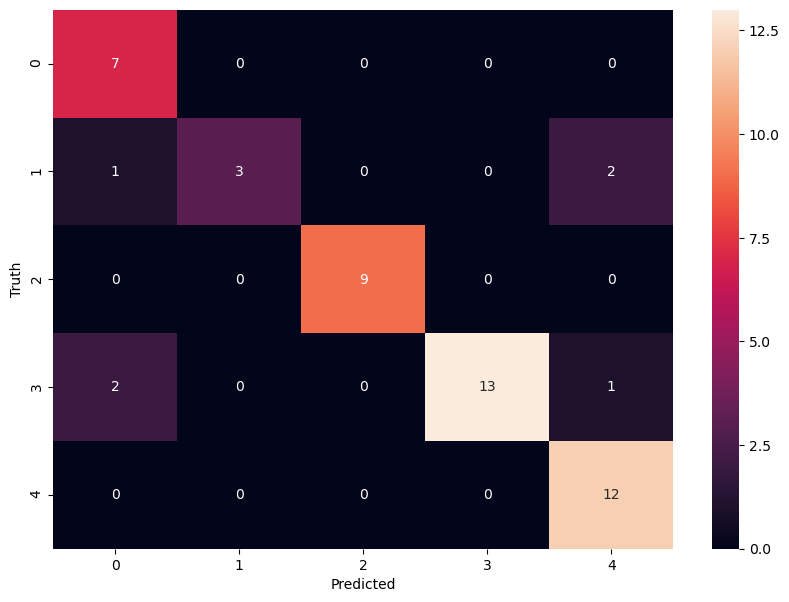

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
class_dict

{'david_alaba': 0,
 'fede_valverde': 1,
 'karim_benzema': 2,
 'luka_modric': 3,
 'toni_kroos': 4}

In [51]:
class_dict2

{0: 'david_alaba',
 1: 'fede_valverde',
 2: 'karim_benzema',
 3: 'luka_modric',
 4: 'toni_kroos'}

In [52]:
class_dict2[0]

'david_alaba'

In [53]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(best_clf, pickle_out)
pickle_out.close()